# Book Price Prediction
#### Chintan Chitroda

Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else.

Here we explore a big database of books. Books of different genres, from thousands of authors. In this Project, We are required to use this dataset to build a Machine Learning
model to predict the price of books based on a given set of features below:

# FEATURES:

*  Title: The title of the book

*  Author: The author(s) of the book.

*  Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)

*  Reviews: The customer reviews about the book

*  Ratings: The customer ratings of the book

*  Synopsis: The synopsis of the book

*  Genre: The genre the book belongs to

*  BookCategory: The department the book is usually available at.

*  Price: The price of the book (Target variable)

### Note:
##### In this Notebook many different algorithm and approaches are used to Predict the Price,  But the Final output file generated named ,
##### But the Final output file generated named "Predicted.csv"  is generated using LightGBM.

### Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('TrainDataset.csv')
test = pd.read_csv("TestDataset.csv")

In [3]:
print('Train Dataset contain',train.shape[0],'rows &',train.shape[1],'columns.')
print('Test Dataset contain',test.shape[0],'rows &',test.shape[1],'columns.')

Train Dataset contain 4989 rows & 9 columns.
Test Dataset contain 1248 rows & 8 columns.


In [4]:
train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,Geek Heresy,Kentaro Toyama,"Hardcover,– 26 May 2015",5.0 out of 5 stars,3 customer reviews,After a decade designing technologies meant to...,Economic Policy & Development,"Computing, Internet & Digital Media",799.0
1,Americanah,Chimamanda Ngozi Adichie,"Paperback,– 25 Jul 2014",4.1 out of 5 stars,49 customer reviews,"As teenagers in Lagos, Ifemelu and Obinze fall...",Romance (Books),Romance,223.0
2,AWS Certified Solutions Architect Associate Al...,Joyjeet Banerjee,"Paperback,– Audiobook, 10 Aug 2018",3.9 out of 5 stars,4 customer reviews,This effective study guide provides 100% cover...,Networks & System Administration (Books),"Computing, Internet & Digital Media",2677.0


In [5]:
test.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,"When I Stop Talking, You'll Know I'm Dead",Jerry Weintraub,"Paperback,– 23 Mar 2011",4.7 out of 5 stars,4 customer reviews,Here is the story of Jerry Weintraub: the self...,Cinema & Broadcast (Books),Humour
1,Alex Rider 11: Never Say Die,Anthony Horowitz,"Paperback,– Jul 2018",4.5 out of 5 stars,17 customer reviews,"Alex Rider is back in this brand new, explosiv...",Action & Adventure (Books),Action & Adventure
2,A Legacy of Spies,John le Carré,"Paperback,– 4 Oct 2017",4.1 out of 5 stars,29 customer reviews,"Peter Guillam, staunch colleague and disciple ...",Action & Adventure (Books),Politics


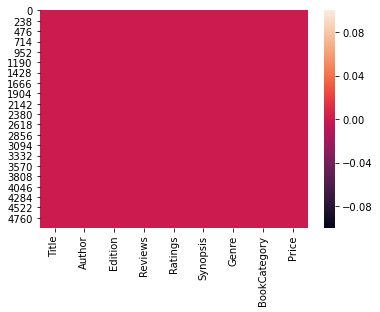

In [6]:
sns.heatmap(train.isnull())

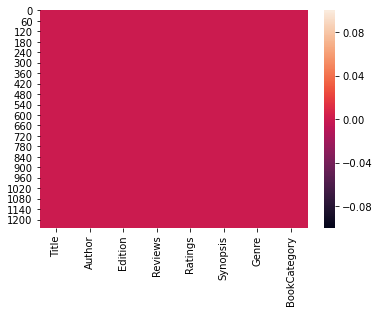

In [7]:
sns.heatmap(test.isnull())

## NO null values in Datasets

---------------------------------------------------------------------------------------------------

## Data Wrangling

In [8]:
train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [9]:
price = train.Price
train.drop('Price',axis=1,inplace=True)

In [10]:
test.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')

In [11]:
joined = train.append(test)

In [12]:
### Cleaning Edition Columns
list1 = []
for i in list(joined.Edition):
    list1.append(i.split(',')[0])

In [13]:
joined.Edition = list1

In [14]:
### Cleaning Reviews Columns
list1 = []
for i in joined.Reviews:
    list1.append(i.split(" ")[0])

In [15]:
joined.Reviews = list1

In [16]:
### Cleaning Ratings Columns
list1=[]
for i in joined.Ratings:
    list1.append(i.split(" ")[0])


In [17]:
joined.Ratings = list1

### One Hot Encoding AUTHOR,EDITION,GENRE,BOOKCATEGORY

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
joined.Author = le.fit_transform(joined.Author)
joined.Edition = le.fit_transform(joined.Edition)
joined.Genre = le.fit_transform(joined.Genre)
joined.BookCategory = le.fit_transform(joined.BookCategory)

In [19]:
## Dropping Synopsis and Title
joined.drop('Synopsis',axis=1,inplace=True)
joined.drop('Title',axis=1,inplace=True)

In [20]:
joined.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,1799,7,5.0,3,109,4
1,601,12,4.1,49,282,9
2,1672,12,3.9,4,237,4
3,1585,12,4.9,14,205,7
4,1245,12,5.0,11,230,7


In [21]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 1247
Data columns (total 6 columns):
Author          6237 non-null int32
Edition         6237 non-null int32
Reviews         6237 non-null object
Ratings         6237 non-null object
Genre           6237 non-null int32
BookCategory    6237 non-null int32
dtypes: int32(4), object(2)
memory usage: 243.6+ KB


In [22]:
### Convertings Obejects dtypes to int and float
joined.Reviews = joined.Reviews.astype(float)
joined.Ratings = joined.Ratings.astype(str)
joined.Ratings = joined.Ratings.str.replace(',','')
joined.Ratings = joined.Ratings.astype(int)

### Divinding into original Test and Train

In [23]:
training = joined.iloc[:4989]
training['Price'] = price
testing = joined.iloc[4989:]

## Some Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

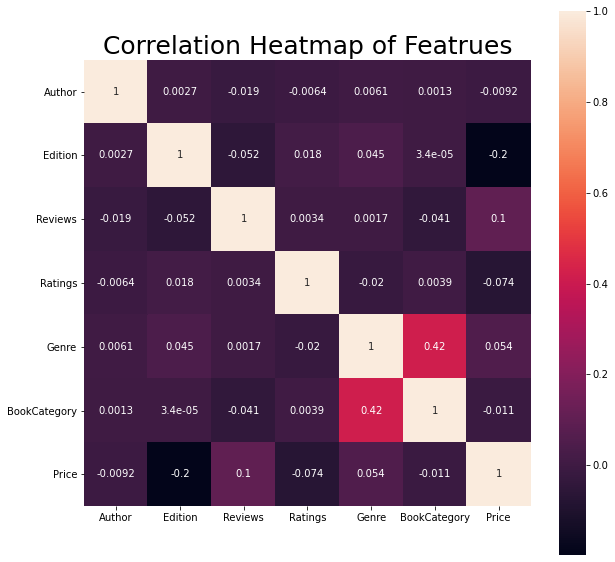

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(training.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=25)

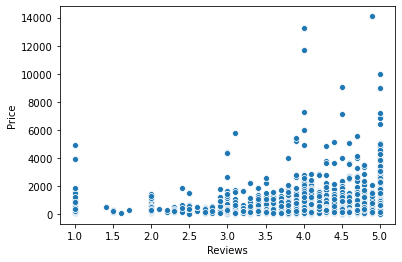

In [25]:
sns.scatterplot(training.Reviews,training.Price)

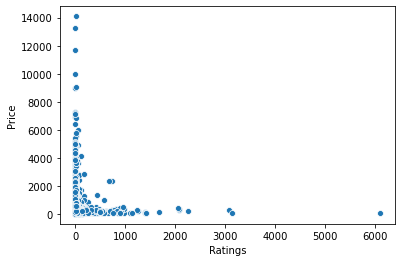

In [26]:
sns.scatterplot(training.Ratings,training.Price)

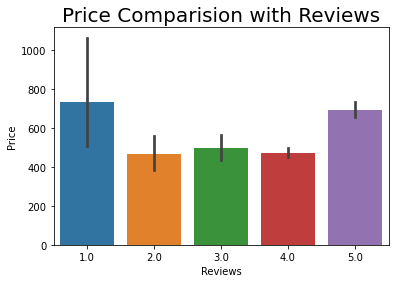

In [27]:
plt.title('Price Comparision with Reviews',size=20)
sns.barplot(round(training.Reviews),training.Price)

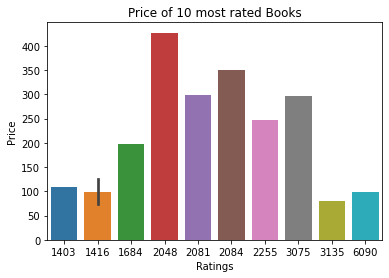

In [28]:
plt.title('Price of 10 most rated Books')
sns.barplot(training.Ratings.sort_values(ascending=False).head(11),training.Price)

<BarContainer object of 4989 artists>

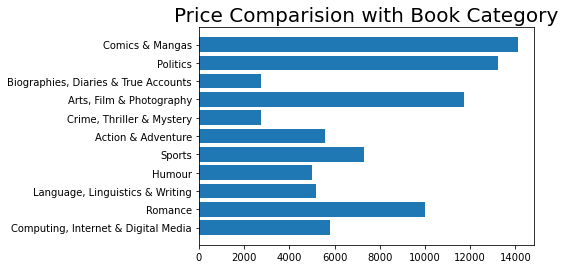

In [29]:
plt.title('Price Comparision with Book Category',size=20)
plt.barh(train.BookCategory,price)

In [30]:
training.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,1799,7,5.0,3,109,4,799.0
1,601,12,4.1,49,282,9,223.0
2,1672,12,3.9,4,237,4,2677.0
3,1585,12,4.9,14,205,7,675.0
4,1245,12,5.0,11,230,7,204.0


## ML Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error

In [32]:
X = training.drop('Price',axis=1)
y = training[['Price']]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

### XBGBoost

In [34]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth=16, 
                             random_state =101,
                             n_estimators=150,
                            )

In [35]:
model_xgb.fit(X_train,y_train)

[21:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=16, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:
y_pred = model_xgb.predict(X_test)

In [37]:
print('RMSLE :',(np.sqrt(mean_squared_log_error( y_test, abs(y_pred)))))

RMSLE : 0.760124566106767


## Using RFE

In [38]:
from sklearn.feature_selection import RFE

In [39]:
rfe = RFE(model_xgb, 3)
rfe.fit(X_train,y_train)

[21:23:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                           colsample_bylevel=1, colsample_bynode=1,
                           colsample_bytree=1, gamma=0, importance_type='gain',
                           learning_rate=0.1, max_delta_step=0, max_depth=16,
                           min_child_weight=1, missing=None, n_estimators=150,
                           n_jobs=1, nthread=None, objective='reg:linear',
                           random_state=101, reg_alpha=0, reg_lambda=1,
                           scale_pos_weight=1, seed=None, silent=None,
                           subsample=1, verbosity=1),
    n_features_to_select=3, step=1, verbose=0)

In [40]:
rfe.support_

array([False,  True, False, False,  True,  True])

In [41]:
print(X_train.columns[rfe.support_])

Index(['Edition', 'Genre', 'BookCategory'], dtype='object')


In [42]:
Rcols = X_train.columns[rfe.support_]
model_xgb.fit(X_train[Rcols],y_train)
y_pred = model_xgb.predict(X_test[Rcols])

[21:23:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
print('RMSLE :',(np.sqrt(mean_squared_log_error( abs(y_test),abs(y_pred)))))

RMSLE : 0.739711383394829


### Manul Elimination

In [44]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              556.4
Date:                Fri, 31 Jan 2020   Prob (F-statistic):                        0.00
Time:                        21:23:23   Log-Likelihood:                         -39792.
No. Observations:                4989   AIC:                                  7.960e+04
Df Residuals:                    4983   BIC:                                  7.964e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 101,n_estimators = 50)

In [46]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
print('RMSLE :',(np.sqrt(mean_squared_log_error( abs(y_test),abs(y_pred)))))

RMSLE : 0.7121154946351049


## Use RFE

In [49]:
rfe = RFE(rf, 2)
rfe.fit(X_train,y_train)
rfe.support_
print(X_train.columns[rfe.support_])

Rcols = X_train.columns[rfe.support_]
rf.fit(X_train[Rcols],y_train)
y_pred = rf.predict(X_test[Rcols])

Index(['Author', 'Genre'], dtype='object')


In [50]:
print('RMSLE :',(np.sqrt(mean_squared_log_error( abs(y_test),abs(y_pred)))))

RMSLE : 0.745446705919077


### Manual Approach
* Dropping cols with P<0.05

In [51]:
training.columns

Index(['Author', 'Edition', 'Reviews', 'Ratings', 'Genre', 'BookCategory',
       'Price'],
      dtype='object')

In [52]:
tt = ['Edition', 'Reviews', 'Ratings', 'Genre']

In [53]:
rf.fit(X_train[tt],y_train)
y_pred = rf.predict(X_test[tt])

In [54]:
print('RMSLE :',(np.sqrt(mean_squared_log_error(y_test,abs(y_pred)))))

RMSLE : 0.734491301902482


## Using SVR

In [55]:
from sklearn.svm import SVR

In [56]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_predsvr = clf.predict(X_test)

In [58]:
print('RMSLE for SVR :',(np.sqrt(mean_squared_log_error( y_test, y_predsvr))))

RMSLE for SVR : 0.7727635379591464


## Using LIGHT GBM

In [59]:
import lightgbm as lgb

In [60]:
X=training.drop('Price',axis=1)
y=training[['Price']].values

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

In [62]:
y_train = y_train.ravel()

In [63]:
model = lgb.LGBMRegressor(n_estimators=600,random_state=10)
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              learning_rate=0.1, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=600,
              n_jobs=-1, num_leaves=31, objective=None, random_state=10,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=1)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print('RMSLE for Light GBM:',(np.sqrt(mean_squared_log_error( y_test,abs(y_pred)))))

RMSLE for Light GBM: 0.9070474494875347


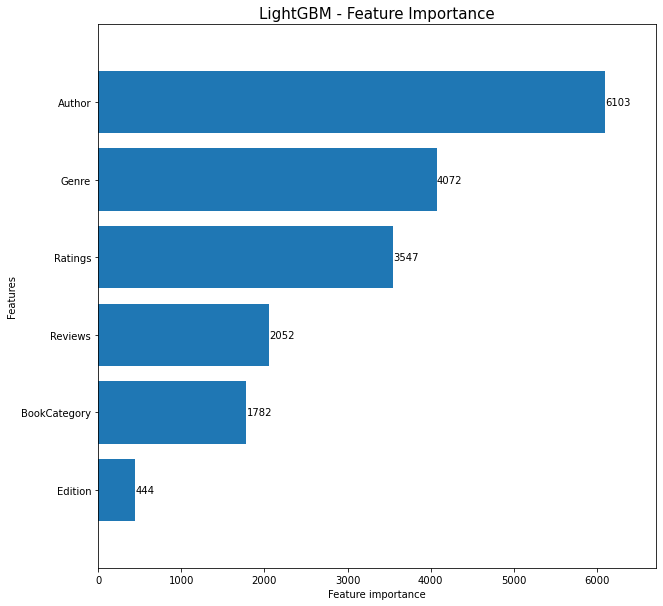

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

## We see that the Author, Genre and Ratings plays an important role in Price of Book.

###### As we are getting the Best RMSLE Score from LightGBM algorithm we predict test file with LightGBM.

In [67]:
sol = model.predict(testing)

In [68]:
solution = pd.DataFrame(abs(sol),columns={'Price'})

In [69]:
solution.head()

,Price
0,722.122784
1,452.056867
2,245.324959
3,348.231036
4,191.579503


In [70]:
solution.to_csv('Predicted.csv',index=False)

In [71]:
test['Price'] = solution.Price

In [72]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,"When I Stop Talking, You'll Know I'm Dead",Jerry Weintraub,"Paperback,– 23 Mar 2011",4.7 out of 5 stars,4 customer reviews,Here is the story of Jerry Weintraub: the self...,Cinema & Broadcast (Books),Humour,722.122784
1,Alex Rider 11: Never Say Die,Anthony Horowitz,"Paperback,– Jul 2018",4.5 out of 5 stars,17 customer reviews,"Alex Rider is back in this brand new, explosiv...",Action & Adventure (Books),Action & Adventure,452.056867
2,A Legacy of Spies,John le Carré,"Paperback,– 4 Oct 2017",4.1 out of 5 stars,29 customer reviews,"Peter Guillam, staunch colleague and disciple ...",Action & Adventure (Books),Politics,245.324959
3,Dark Places,Gillian Flynn,"Paperback,– 10 Jun 2010",4.1 out of 5 stars,62 customer reviews,Your brother murdered your family. Your eviden...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",348.231036
4,A Pelican Introduction: The Human Planet: How ...,Simon Lewis,"Mass Market Paperback,– Import, 24 Jul 2018",3.0 out of 5 stars,1 customer review,'Brilliantly written and genuinely one of the ...,Earth Sciences Textbooks,"Crime, Thriller & Mystery",191.579503


### Thank You